In [166]:
import pandas as pd #data manipulation
from sklearn.impute import SimpleImputer # performing Imputation task
import numpy as np #numerical calculations
import matplotlib.pyplot as plt #data visualization
from feature_engine.outliers import Winsorizer #outlier treatment
import seaborn as sns #advanced data visualization
import scipy.stats as stats #statistical analysis
import pylab
from scipy.cluster.hierarchy import linkage, dendrogram  #for creating dendrogram
from sklearn.cluster import AgglomerativeClustering

In [129]:
data = pd.read_excel("University_Clustering.xlsx") #read the dataframe
data.head() # get first 5 rows

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0


In [130]:
data.shape #diamension of the dataframe

(25, 9)

In [131]:
data.info()  #information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UnivID    25 non-null     int64  
 1   Univ      25 non-null     object 
 2   State     25 non-null     object 
 3   SAT       24 non-null     float64
 4   Top10     25 non-null     int64  
 5   Accept    25 non-null     int64  
 6   SFRatio   24 non-null     float64
 7   Expenses  25 non-null     int64  
 8   GradRate  24 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ KB


In [132]:
data.describe()  #EDA

,UnivID,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
mean,13.000000,1266.916667,76.480000,39.200000,12.708333,27388.000000,86.666667
std,7.359801,110.663578,19.433905,19.727308,4.154402,14424.883165,9.248580
min,1.000000,1005.000000,28.000000,14.000000,6.000000,8704.000000,67.000000
25%,7.000000,1236.250000,74.000000,24.000000,10.750000,15140.000000,80.750000
50%,13.000000,1287.500000,81.000000,36.000000,12.000000,27553.000000,90.000000
75%,19.000000,1345.000000,90.000000,50.000000,14.250000,34870.000000,94.000000
max,25.000000,1415.000000,100.000000,90.000000,25.000000,63575.000000,97.000000


In [133]:
data.drop('UnivID', axis = 1, inplace = True)   #removing UnivID column 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       24 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   24 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  24 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


In [134]:
data.duplicated().sum() #checking for duplicate values

0

In [135]:
data.isna().sum()   #checking for null values

Univ        0
State       0
SAT         1
Top10       0
Accept      0
SFRatio     1
Expenses    0
GradRate    1
dtype: int64

In [136]:
#imputation for removing the duplicates

In [137]:
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data['SAT'] = pd.DataFrame(mean_imputer.fit_transform(data[['SAT']]))
data['SAT'].isna().sum()

0

In [138]:
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data['SFRatio'] = pd.DataFrame(mean_imputer.fit_transform(data[['SFRatio']]))
data['SFRatio'].isna().sum()

0

In [139]:
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data['GradRate'] = pd.DataFrame(median_imputer.fit_transform(data[['GradRate']]))
data['GradRate'].isna().sum()

0

In [140]:
data.isna().sum()    #checking again for missing values

Univ        0
State       0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [141]:
#deviding categorical data and numerical data
data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,Columbia,NY,1310.0,76,24,12.0,31510,90.0
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0


In [142]:
data_cat = data.iloc[:,:2]
data_num = data.iloc[:,2:]
data_num.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310.0,89,22,13.0,22704,94.0
1,1415.0,100,25,6.0,63575,81.0
2,1260.0,62,59,9.0,25026,72.0
3,1310.0,76,24,12.0,31510,90.0
4,1280.0,83,33,13.0,21864,90.0


In [143]:
data_cat.head()

,Univ,State
0,Brown,RI
1,CalTech,CA
2,CMU,PA
3,Columbia,NY
4,Cornell,NY


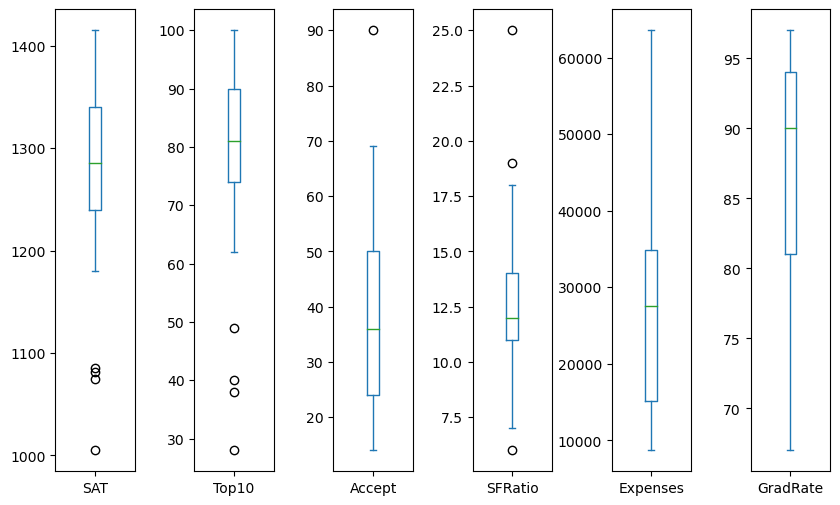

In [144]:
#Boxplot
data_num.plot(kind = 'box', subplots = True, sharey = False, figsize= (10,6))
plt.subplots_adjust(wspace = .75)
plt.show()

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


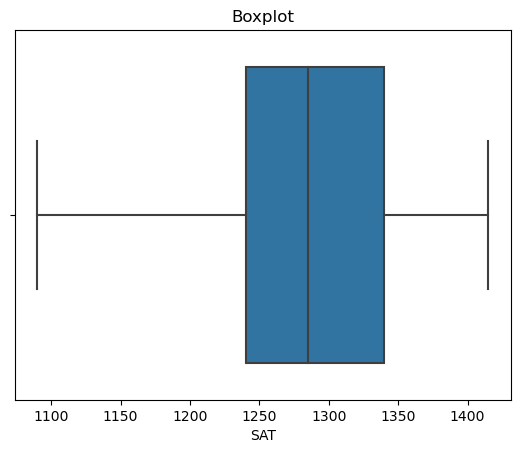

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


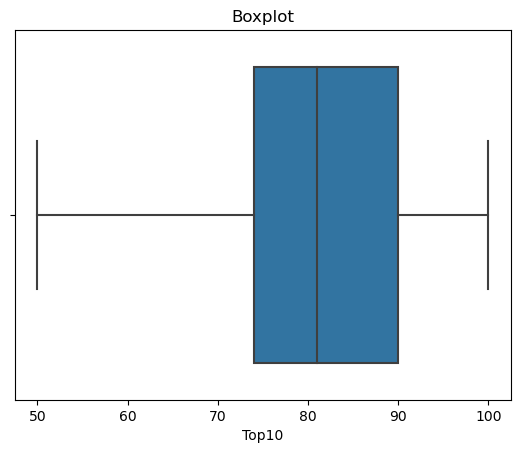

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


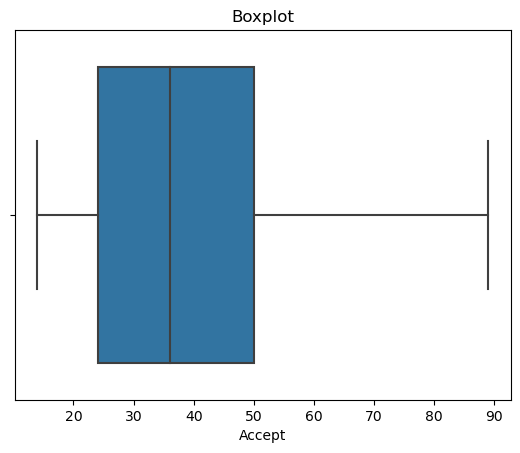

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


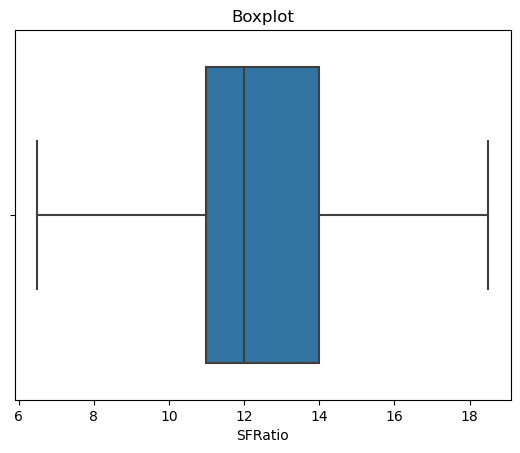

In [145]:
variables = ['SAT', 'Top10', 'Accept', 'SFRatio']
for vari in variables:
    winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = [vari])
    data_num[vari] = winsor.fit_transform(data_num[[vari]])
    sns.boxplot(data_num[vari])
    plt.title("Boxplot")
    plt.show()
    

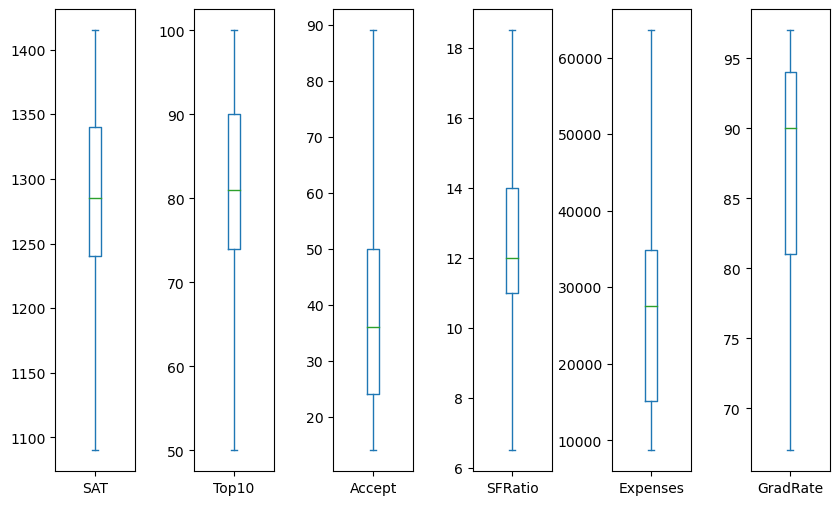

In [146]:
data_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10,6))   
plt.subplots_adjust(wspace = .75)

In [147]:
data_num.var()   #checking for zero or near zero variance

SAT         9.718958e+03
Top10       2.446267e+02
Accept      3.849733e+02
SFRatio     1.105111e+01
Expenses    2.080773e+08
GradRate    8.241667e+01
dtype: float64

In [ ]:
#Applying onehot encoding on State column

In [148]:
data_cat = pd.get_dummies(data_cat, columns = ['State'], drop_first = True)

In [149]:
data_cat.head()

,Univ,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,State_NJ,State_NY,State_PA,State_RI,State_TX,State_VA,State_WI
0,Brown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,CalTech,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CMU,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Columbia,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Cornell,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [150]:
data_num.columns

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

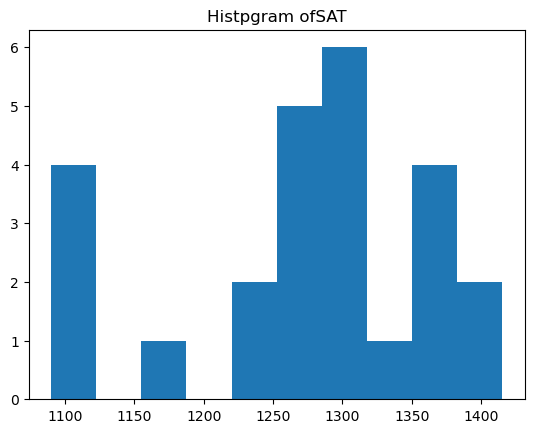

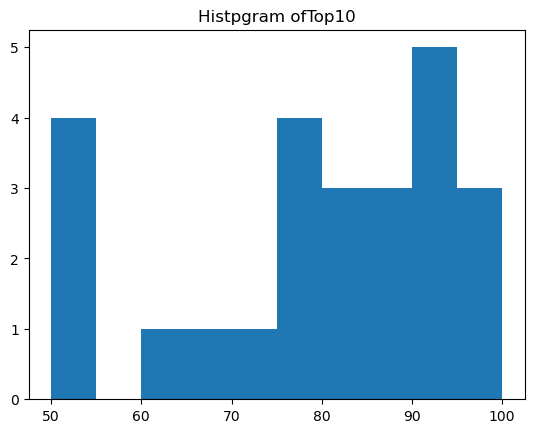

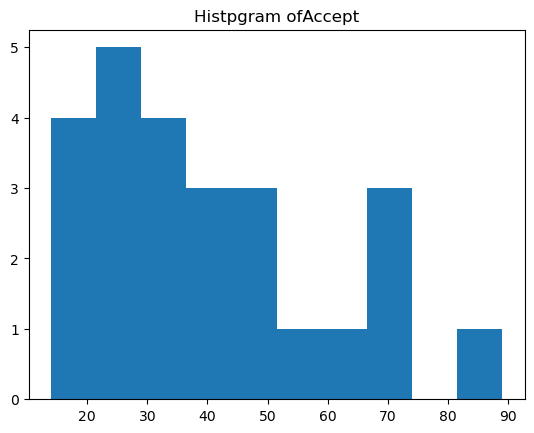

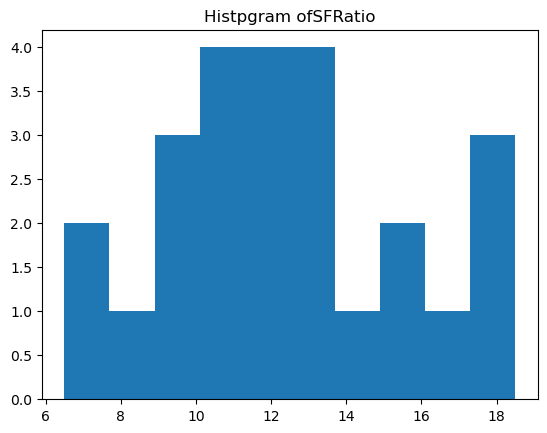

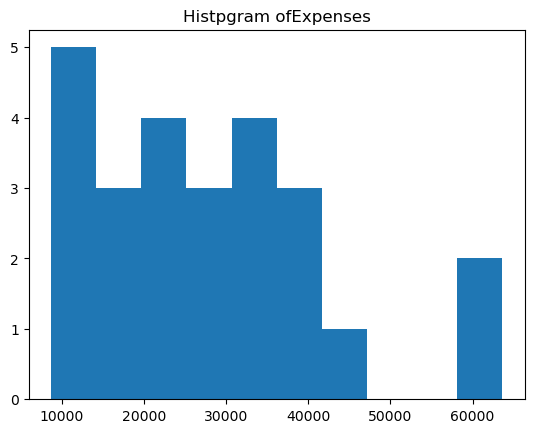

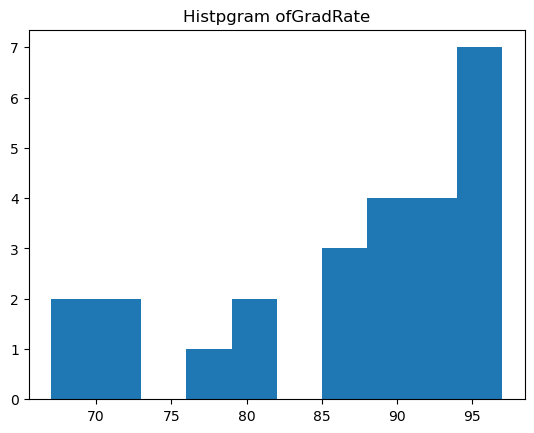

In [151]:
#histogram
for col in data_num.columns:
    plt.hist(data_num[col])
    plt.title('Histpgram of'+ str(col))
    plt.show()

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1090.        , 1090.        , 1090.        , 1090.        ,
         1180.        , 1225.        , 1240.        , 1255.        ,
         1260.        , 1260.        , 1266.91666667, 1280.        ,
         1285.        , 1290.        , 1305.        , 1310.        ,
         1310.        , 1315.        , 1340.        , 1360.        ,
         1375.        , 1375.        , 1380.        , 1400.        ,
         1415.        ])),
 (98.76659036154761, 1271.4766666666667, 0.9585447047103506))

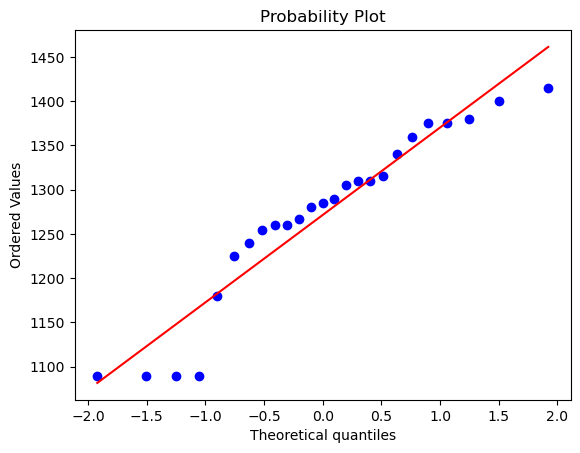

In [152]:
#Normal Quantile Quantile Plot

stats.probplot(data_num['SAT'], dist = 'norm', plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 50.,  50.,  50.,  50.,  62.,  65.,  74.,  75.,  75.,  76.,  77.,
          80.,  81.,  83.,  85.,  89.,  89.,  90.,  90.,  91.,  91.,  94.,
          95.,  95., 100.])),
 (15.548174662321594, 78.28, 0.9511295549439859))

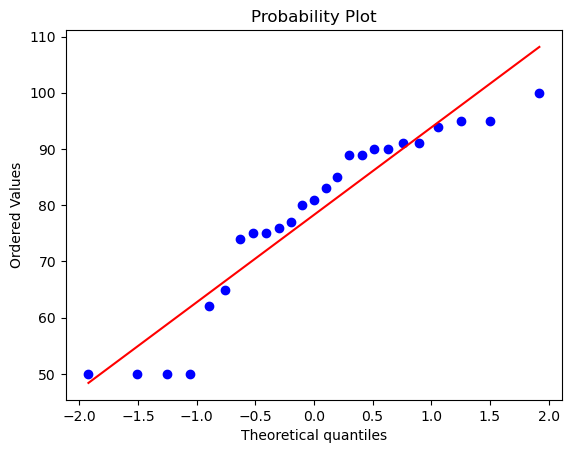

In [153]:
stats.probplot(data_num['Top10'], dist = 'norm', plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([14., 14., 19., 20., 22., 23., 24., 24., 25., 30., 30., 33., 36.,
         39., 40., 42., 44., 44., 50., 54., 59., 67., 68., 69., 89.])),
 (19.80617941670123, 39.16, 0.9658230149511988))

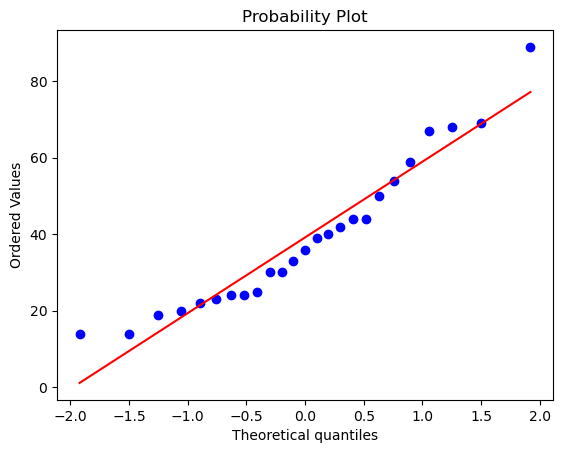

In [154]:
stats.probplot(data_num['Accept'], dist = 'norm', plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 6.5       ,  7.        ,  8.        ,  9.        , 10.        ,
         10.        , 11.        , 11.        , 11.        , 11.        ,
         12.        , 12.        , 12.        , 12.        , 12.70833333,
         13.        , 13.        , 13.        , 14.        , 15.        ,
         16.        , 17.        , 18.        , 18.5       , 18.5       ])),
 (3.4122385959318278, 12.448333333333334, 0.9820838816626102))

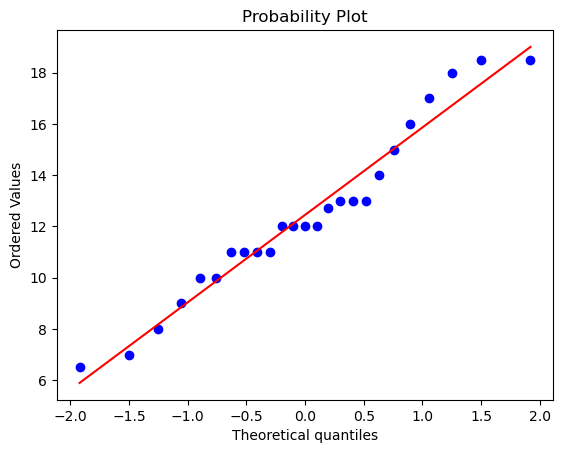

In [155]:
stats.probplot(data_num['SFRatio'], dist = 'norm', plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 8704,  9066, 10185, 11857, 13349, 15122, 15140, 15470, 20126,
         21864, 22704, 25026, 27553, 28052, 30220, 31510, 31585, 32162,
         34870, 36450, 38380, 39525, 43514, 58691, 63575], dtype=int64)),
 (14567.431669324988, 27387.999999999996, 0.9662351902369902))

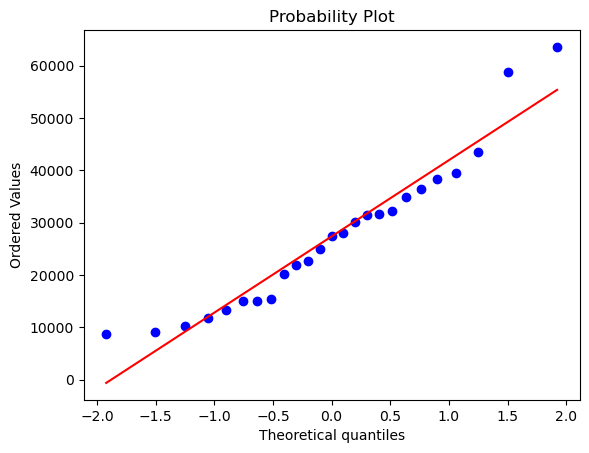

In [156]:
stats.probplot(data_num['Expenses'], dist = 'norm', plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([67., 69., 71., 72., 78., 80., 81., 85., 87., 87., 89., 90., 90.,
         90., 91., 92., 92., 93., 94., 94., 95., 95., 95., 96., 97.])),
 (8.862821523733807, 86.8, 0.9340640254803643))

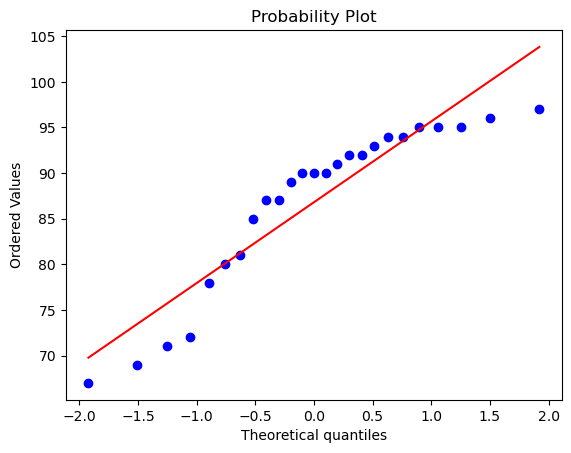

In [157]:
stats.probplot(data_num['GradRate'], dist = 'norm', plot = pylab)

In [158]:
#concatenate entire data

data1 = pd.concat([data_cat,data_num], axis =1)
data1.head()

,Univ,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1310.0,89.0,22.0,13.0,22704,94.0
1,CalTech,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1415.0,100.0,25.0,6.5,63575,81.0
2,CMU,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1260.0,62.0,59.0,9.0,25026,72.0
3,Columbia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1310.0,76.0,24.0,12.0,31510,90.0
4,Cornell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1280.0,83.0,33.0,13.0,21864,90.0


In [159]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State_CT  25 non-null     uint8  
 2   State_DC  25 non-null     uint8  
 3   State_IL  25 non-null     uint8  
 4   State_IN  25 non-null     uint8  
 5   State_MA  25 non-null     uint8  
 6   State_MD  25 non-null     uint8  
 7   State_MI  25 non-null     uint8  
 8   State_NC  25 non-null     uint8  
 9   State_NH  25 non-null     uint8  
 10  State_NJ  25 non-null     uint8  
 11  State_NY  25 non-null     uint8  
 12  State_PA  25 non-null     uint8  
 13  State_RI  25 non-null     uint8  
 14  State_TX  25 non-null     uint8  
 15  State_VA  25 non-null     uint8  
 16  State_WI  25 non-null     uint8  
 17  SAT       25 non-null     float64
 18  Top10     25 non-null     float64
 19  Accept    25 non-null     float64
 20  SFRatio   25 non-null     float64


In [ ]:
#normalization min = 0 and max = 1

In [162]:
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return (x)

In [163]:
data_norm = norm_func(data1.iloc[:,1:])

In [164]:
data_norm.describe()

,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,State_NJ,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.00,25.00,25.000000,25.000000,25.000000,25.00,25.00,25.00,25.00,25.00,...,25.00,25.00,25.00,25.00,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.04,0.04,0.080000,0.080000,0.080000,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.558390,0.565600,0.335467,0.495694,0.340508,0.660000
std,0.20,0.20,0.276887,0.276887,0.276887,0.20,0.20,0.20,0.20,0.20,...,0.20,0.20,0.20,0.20,0.303338,0.312811,0.261610,0.277027,0.262887,0.302612
min,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.461538,0.480000,0.133333,0.375000,0.117293,0.466667
50%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.600000,0.620000,0.293333,0.458333,0.343515,0.766667
75%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.769231,0.800000,0.480000,0.625000,0.476864,0.900000
max,1.00,1.00,1.000000,1.000000,1.000000,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Hierarchical Clustering - Agglomerative Clustering

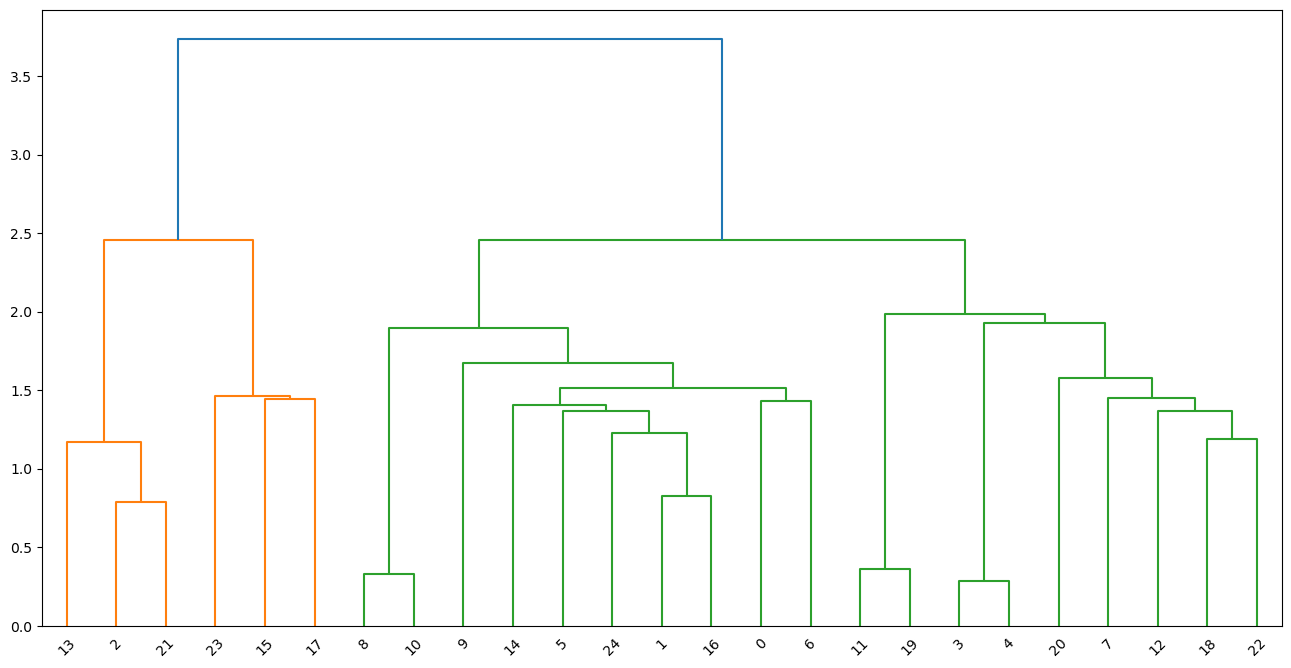

In [171]:
plt.figure(1, figsize = (16,8))
tree_plot = dendrogram(linkage(data_norm, method = 'ward'))

In [ ]:
#choosing 3 as clister from above dendrogram

In [173]:
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

In [174]:
y_hc1 = hc1.fit_predict(data_norm)
y_hc1

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2,
       2, 0, 1], dtype=int64)

In [175]:
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_hc2 = hc2.fit_predict(data_norm)
y_hc2

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       1, 0, 1], dtype=int64)

In [178]:
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y_hc3 = hc3.fit_predict(data_norm)
y_hc3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [181]:
hc1.labels_  # Refering to the results obtained from linkage = 'complete' method

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2,
       2, 0, 1], dtype=int64)

In [182]:
cluster_labels = pd.Series(hc1.labels_)

In [183]:
data['cluster'] = cluster_labels

In [184]:
data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,1
1,CalTech,CA,1415.0,100,25,6.0,63575,81.0,1
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,2
3,Columbia,NY,1310.0,76,24,12.0,31510,90.0,1
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,1


In [185]:
data_sort = data.sort_values(by = 'cluster', ascending = True )  #sorting the data 
data_sort.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
12,NotreDame,IN,1255.0,81,42,13.000000,15122,94.0,0
17,TexasA&M,TX,1075.0,49,67,25.000000,8704,67.0,0
15,Purdue,IN,1005.0,28,90,19.000000,9066,69.0,0
23,UWisconsin,WI,1085.0,40,69,15.000000,11857,71.0,0
19,UChicago,IL,1290.0,75,50,12.708333,38380,87.0,1


In [186]:
data_sort.iloc[:,2:9].groupby(data_sort.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
cluster,,,,,,,
0,1105.000000,49.500000,67.000000,18.000000,11187.250000,75.250000,0.0
1,1332.127778,86.466667,27.400000,10.713889,35548.533333,91.466667,1.0
2,1211.833333,69.500000,50.166667,14.166667,17787.166667,82.833333,2.0


In [188]:
cluster0 = data_sort.loc[data_sort.cluster == 0]
cluster0

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
12,NotreDame,IN,1255.0,81,42,13.0,15122,94.0,0
17,TexasA&M,TX,1075.0,49,67,25.0,8704,67.0,0
15,Purdue,IN,1005.0,28,90,19.0,9066,69.0,0
23,UWisconsin,WI,1085.0,40,69,15.0,11857,71.0,0


In [189]:
cluster1 = data_sort.loc[data_sort.cluster == 1]
cluster1

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
19,UChicago,IL,1290.000000,75,50,12.708333,38380,87.0,1
16,Stanford,CA,1360.000000,90,20,12.000000,36450,93.0,1
14,Princeton,NJ,1375.000000,91,14,8.000000,30220,95.0,1
11,Northwestern,IL,1260.000000,85,39,11.000000,28052,89.0,1
10,MIT,MA,1380.000000,94,30,10.000000,34870,91.0,1
0,Brown,RI,1310.000000,89,22,13.000000,22704,94.0,1
8,Harvard,MA,1400.000000,91,14,11.000000,39525,97.0,1
7,Georgetown,DC,1266.916667,74,24,12.000000,20126,92.0,1
6,Duke,NC,1315.000000,90,30,12.000000,31585,95.0,1
5,Dartmouth,NH,1340.000000,89,23,10.000000,32162,95.0,1


In [190]:
cluster2 = data_sort.loc[data_sort.cluster == 2]
cluster2

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
13,PennState,PA,1081.0,38,54,18.0,10185,80.0,2
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,2
18,UCBerkeley,CA,1240.0,95,40,17.0,15140,78.0,2
20,UMichigan,MI,1180.0,65,68,16.0,15470,85.0,2
21,UPenn,PA,1285.0,80,36,11.0,27553,90.0,2
22,UVA,VA,1225.0,77,44,14.0,13349,92.0,2


In [200]:
cluster0.to_csv('university_0.csv',encoding = 'utf-8')
import os
os.getcwd

<function nt.getcwd()>

In [201]:
cluster1.to_csv('university_1.csv', encoding = 'utf-8')
import os
os.getcwd

<function nt.getcwd()>

In [202]:
cluster2.to_csv('university_2.csv', encoding = 'utf-8')
import os
os.getcwd

<function nt.getcwd()>